In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/churn-for-bank-customers")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Sadha\.cache\kagglehub\datasets\mathchi\churn-for-bank-customers\versions\1


In [7]:
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
set_config(transform_output ="pandas")

In [8]:
path

'C:\\Users\\Sadha\\.cache\\kagglehub\\datasets\\mathchi\\churn-for-bank-customers\\versions\\1'

In [9]:
df = pd.read_csv(r"C:\Users\Sadha\.cache\kagglehub\datasets\mathchi\churn-for-bank-customers\versions\1\churn.csv")

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#shape of data
df.shape

(10000, 14)

In [12]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
(df.loc[df.isna().any(axis=1)])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [14]:
df.duplicated().sum()

np.int64(0)

## EDA

In [15]:
#Drop the first 3 column
columns_to_drop = df.columns[0:3]
columns_to_drop

Index(['RowNumber', 'CustomerId', 'Surname'], dtype='object')

In [16]:
#drop the columns
df.drop(columns=columns_to_drop,inplace=True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.rename(columns = str.lower,inplace=True)


In [19]:
X = df.drop(columns =["exited"] )
y = df["exited"]

In [20]:
X.shape,y.shape

((10000, 10), (10000,))

In [21]:
df.dtypes

creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

In [22]:
#list_of_columns
numerical_columns = ["creditscore","age","balance","estimatedsalary"]
categorical_columns = ["gender","geography"]
reminder_columns = [column_name for column_name in X.columns if column_name not in numerical_columns + categorical_columns ]
reminder_columns,numerical_columns,categorical_columns

(['tenure', 'numofproducts', 'hascrcard', 'isactivemember'],
 ['creditscore', 'age', 'balance', 'estimatedsalary'],
 ['gender', 'geography'])

In [23]:
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [24]:
def plot_for_numerical_columns (column_name, bin , kde = True):
    #plot the fig size
    fig = plt.figure(figsize=(8,6))
    #gridspace
    grid = GridSpec( nrows =2, ncols=2, height_ratios=[0.6,0.4])
    #define the axes
    ax1 = plt.subplot(grid[0,:])
    ax2 = plt.subplot(grid[1,:])

    #plot histogram
    sns.histplot(data=X,x=column_name,bins = bin,kde=kde,ax=ax1)
    sns.boxplot(data=df,x= column_name,ax=ax2)
    plt.show()


In [25]:
col_bin = {
    column_name : bin_val for column_name,bin_val in zip (numerical_columns,[50,50,'auto','auto'])
}
col_bin

{'creditscore': 50, 'age': 50, 'balance': 'auto', 'estimatedsalary': 'auto'}

Creditscore



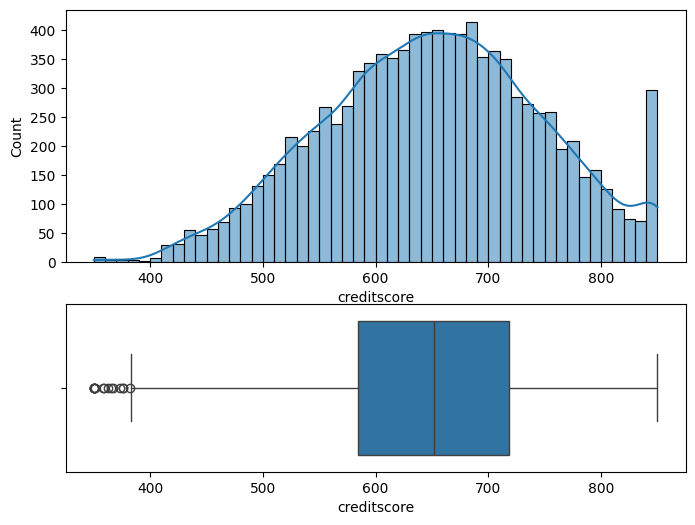




Age



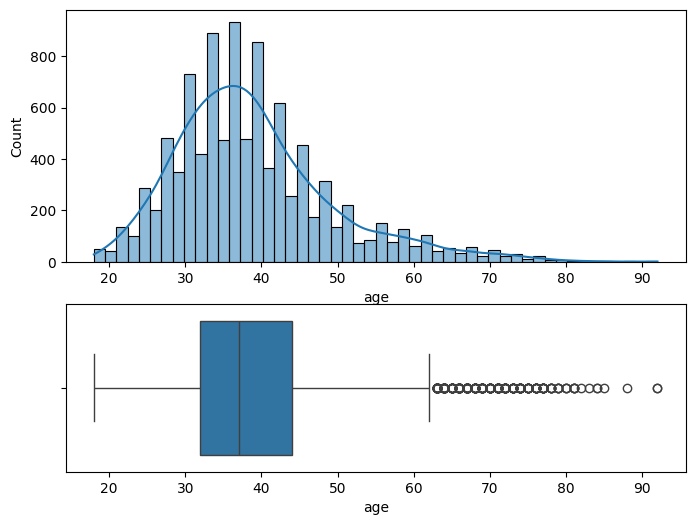




Balance



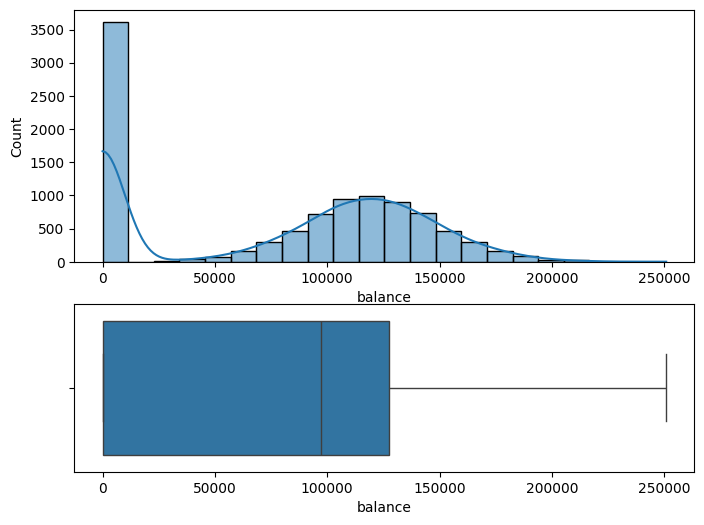




Estimatedsalary



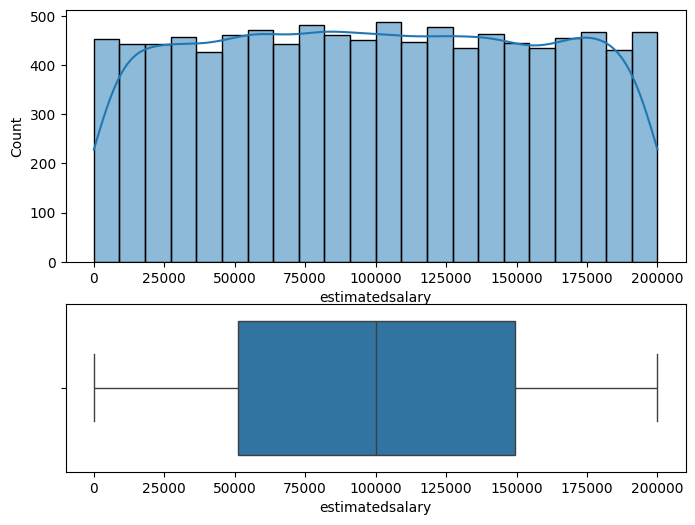

In [26]:
for num_col in numerical_columns:
    print(f"{num_col.title()}",end='\n\n')
    plot_for_numerical_columns(column_name=num_col,bin = col_bin[num_col])
    print("\n\n")

In [27]:
#customer with zero balance
(
    X.loc[
        (X["balance"].eq(0))
    ]
)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88
3,699,France,Female,39,1,0.0,2,0,0,93826.63
6,822,France,Male,50,7,0.0,2,1,1,10062.80
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01
12,476,France,Female,34,10,0.0,2,1,0,26260.98
...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40
9994,800,France,Female,29,2,0.0,2,0,0,167773.55
9995,771,France,Male,39,5,0.0,2,1,0,96270.64


In [28]:
#new columns with balance zero
df["iszerobalance"] = X["balance"].eq(0).astype(int)

In [29]:
df

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,iszerobalance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0


In [30]:
def plot_for_categorical_column(column_name):
    display(X[column_name].value_counts(normalize = True))
    print(f"There are {X[column_name].nunique()}the unique values in the column {column_name} which are  are {X[column_name].unique()}")
    # Plot the countplot
    sns.countplot(data= X,x=column_name)
    plt.show()

Gender


gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

There are 2the unique values in the column gender which are  are ['Female' 'Male']


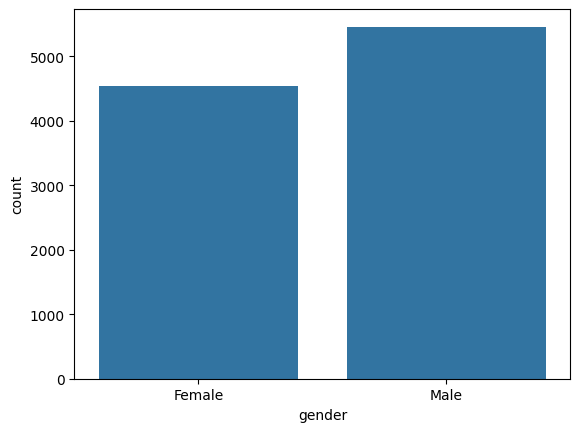


Geography


geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64

There are 3the unique values in the column geography which are  are ['France' 'Spain' 'Germany']


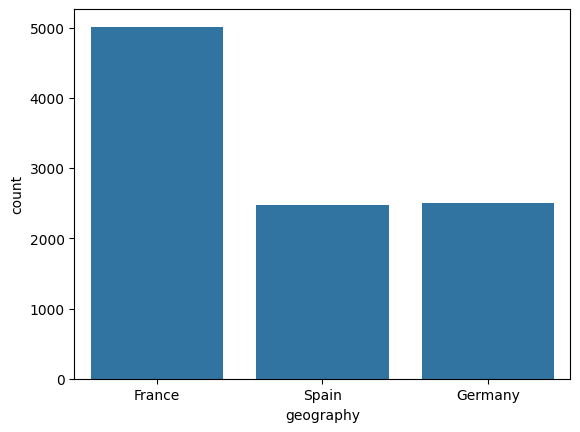

In [31]:
for cat_col in categorical_columns:
    print(f"{cat_col.title()}")
    plot_for_categorical_column(cat_col)
    print()

In [32]:
X

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [33]:
#distribution of target
y.value_counts(normalize=True)

exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

## FE and Model Training

In [34]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_text,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42,stratify=y)
print(f"X_train : {X_train.shape}")
print(f"X_text : { X_text.shape}")


X_train : (8000, 10)
X_text : (2000, 10)


In [36]:
X_train

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
2151,753,France,Male,57,7,0.00,1,1,0,159475.08
8392,739,Germany,Male,32,3,102128.27,1,1,0,63981.37
5006,755,Germany,Female,37,0,113865.23,2,1,1,117396.25
4117,561,France,Male,37,5,0.00,2,1,0,83093.25
7182,692,Germany,Male,49,6,110540.43,2,0,1,107472.99
...,...,...,...,...,...,...,...,...,...,...
4555,688,Spain,Female,35,6,0.00,1,1,0,25488.43
4644,712,Spain,Male,74,5,0.00,2,0,0,151425.82
8942,667,France,Female,37,9,71786.90,2,1,1,67734.79
2935,687,Spain,Male,35,8,100988.39,2,1,0,22247.27


In [37]:
scaler = MinMaxScaler()
encoder = OneHotEncoder(handle_unknown="ignore",sparse_output=False)
#columns Transformer
preprocessor = ColumnTransformer(transformers=[
    ("scaler",scaler,numerical_columns),
    ("encoder",encoder,categorical_columns)
],remainder="passthrough",verbose_feature_names_out=False
)


In [38]:
preprocessor

,transformers,"[('scaler', ...), ('encoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [39]:
#Apply the transformations
X_train = preprocessor.fit_transform(X_train)
X_test= preprocessor.transform(X_text)


In [40]:
X_train

,creditscore,age,balance,estimatedsalary,gender_Female,gender_Male,geography_France,geography_Germany,geography_Spain,tenure,numofproducts,hascrcard,isactivemember
2151,0.806,0.527027,0.000000,0.797394,0.0,1.0,1.0,0.0,0.0,7,1,1,0
8392,0.778,0.189189,0.428413,0.319879,0.0,1.0,0.0,1.0,0.0,3,1,1,0
5006,0.810,0.256757,0.477648,0.586979,1.0,0.0,0.0,1.0,0.0,0,2,1,1
4117,0.422,0.256757,0.000000,0.415448,0.0,1.0,1.0,0.0,0.0,5,2,1,0
7182,0.684,0.418919,0.463700,0.537358,0.0,1.0,0.0,1.0,0.0,6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,0.676,0.229730,0.000000,0.127396,1.0,0.0,0.0,0.0,1.0,6,1,1,0
4644,0.724,0.756757,0.000000,0.757144,0.0,1.0,0.0,0.0,1.0,5,2,0,0
8942,0.634,0.256757,0.301135,0.338648,1.0,0.0,1.0,0.0,0.0,9,2,1,1
2935,0.674,0.229730,0.423631,0.111189,0.0,1.0,0.0,0.0,1.0,8,2,1,0


In [41]:
X_test

,creditscore,age,balance,estimatedsalary,gender_Female,gender_Male,geography_France,geography_Germany,geography_Spain,tenure,numofproducts,hascrcard,isactivemember
5702,0.470,0.243243,0.000000,0.471403,0.0,1.0,1.0,0.0,0.0,7,2,1,0
3667,0.350,0.202703,0.549625,0.275333,0.0,1.0,0.0,1.0,0.0,4,2,0,0
1617,0.414,0.297297,0.000000,0.527160,1.0,0.0,0.0,0.0,1.0,4,2,0,1
5673,0.578,0.216216,0.584733,0.169709,0.0,1.0,0.0,0.0,1.0,5,2,0,0
4272,0.580,0.216216,0.326472,0.842747,1.0,0.0,0.0,0.0,1.0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768,0.648,0.243243,0.648212,0.137299,0.0,1.0,1.0,0.0,0.0,2,1,0,1
833,0.568,0.256757,0.467444,0.835184,0.0,1.0,0.0,1.0,0.0,3,2,1,1
9719,0.332,0.391892,0.538194,0.748084,1.0,0.0,0.0,1.0,0.0,9,1,0,0
2776,0.678,0.283784,0.000000,0.074535,0.0,1.0,1.0,0.0,0.0,7,2,0,0


In [42]:
y_train.shape

(8000,)

In [43]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn. ensemble import RandomForestClassifier


In [44]:
from sklearn.ensemble import VotingClassifier

In [45]:
#Define Models
rf = RandomForestClassifier(class_weight="balanced",random_state=42)
xgb = XGBClassifier(class_weight="balanced",random_state=42)
lgbm = LGBMClassifier(class_weight="balanced",random_state=42)

In [46]:
#Build Voting Classifier
model = VotingClassifier(estimators=[
  ("rf",rf),
  ("xgb",xgb),
  ("lgbm",lgbm)
 ], voting= "soft",n_jobs=-1)

model

,estimators,"[('rf', ...), ('xgb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,-1
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [47]:
model.fit(X_train,y_train)

,estimators,"[('rf', ...), ('xgb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,-1
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [48]:
#Get the prediction on the data
y_pred = model.predict(X_test)

In [49]:
model.predict_proba(X_test.iloc[0:5,:])

array([[0.93826067, 0.06173933],
       [0.91977807, 0.08022194],
       [0.95164383, 0.04835617],
       [0.93399313, 0.06600688],
       [0.89057095, 0.10942904]])

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.68      0.56      0.61       407

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



## Hyper parameter tunning

In [51]:
import optuna
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import StratifiedKFold


In [52]:
def objective(trial : optuna.trial):
    param_dict = {
        "rf__n_estimators" : trial.suggest_int("rf__n_estimators" ,50,200),
        "rf__max_depth" : trial.suggest_int("rf__max_depth",5,12),
        "rf__max_samples" : trial.suggest_float("rf_max_samples",0.5,1),
        "xgb__learning_rate" :trial.suggest_float("xgb__learning_rate",0.01,1),
        "xgb__max_depth" :trial.suggest_int("xgb_max_depth",5,12),
        "xgb__n_estimators" :trial.suggest_int("xgb__n_estimators",30,200),
        "xgb__subsample" : trial.suggest_float("xgb__subsample",0.5,1.0),
        "xgb__colsample_bynode" : trial.suggest_float("xgb__colsample_bynode",0.7,1.0),
        "xgb__reg_lambda" : trial.suggest_float("xgb__reg_lambda",0.1,10.0),
        "lgbm__max_depth" : trial.suggest_int("lgbm__max_depth",5,12),
        "lgbm__n_estimators" :trial.suggest_int("lgbm__n_estimators",30,200),
        "lgbm__learning_rate" :trial.suggest_float("lgbm__learning_rate",0.01,1),
        "lgbm__subsample" : trial.suggest_float("lgbm__subsample",0.5,1.0),
        "lgbm__reg_lambda" : trial.suggest_float("lgbm__reg_lambda",0.1,10.0),
        }
    #define model
    rf = RandomForestClassifier(class_weight="balanced",random_state=42)
    xgb = XGBClassifier(class_weight="balanced",random_state=42)
    lgbm = LGBMClassifier(class_weight="balanced",random_state=42)
    #voting classifier
    #Build Voting Classifier
    model = VotingClassifier(estimators=[
        ("rf",rf),
        ("xgb",xgb),
        ("lgbm",lgbm)
        ], voting= "soft",n_jobs=-1)
    
    #Pass Paramater to model
    model.set_params(**param_dict)
    #Cross validation
    score = cross_val_score(
        estimator=model,
        X=X_train,y=y_train,
        scoring="recall",cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True),n_jobs=-1)

    #mean recall
    mean_recall = np.mean(score)
    return mean_recall


In [53]:
study = optuna.create_study(direction="maximize")
study.optimize(func=objective,n_trials=20,n_jobs=-1,show_progress_bar=True)

[I 2025-12-07 08:09:30,566] A new study created in memory with name: no-name-24152897-3c29-456a-83d2-ff82a20b3874
Best trial: 0. Best value: 0.577914:   5%|▌         | 1/20 [00:24<07:49, 24.69s/it]

[I 2025-12-07 08:09:55,241] Trial 0 finished with value: 0.5779141104294478 and parameters: {'rf__n_estimators': 120, 'rf__max_depth': 9, 'rf_max_samples': 0.9434362581592379, 'xgb__learning_rate': 0.6233382511767022, 'xgb_max_depth': 7, 'xgb__n_estimators': 87, 'xgb__subsample': 0.6495310559239029, 'xgb__colsample_bynode': 0.7491001573420392, 'xgb__reg_lambda': 3.762806184393745, 'lgbm__max_depth': 12, 'lgbm__n_estimators': 48, 'lgbm__learning_rate': 0.47071795160832186, 'lgbm__subsample': 0.6871383239098718, 'lgbm__reg_lambda': 4.281011903175629}. Best is trial 0 with value: 0.5779141104294478.


Best trial: 0. Best value: 0.577914:  10%|█         | 2/20 [00:27<03:34, 11.89s/it]

[I 2025-12-07 08:09:58,161] Trial 2 finished with value: 0.5619631901840492 and parameters: {'rf__n_estimators': 65, 'rf__max_depth': 9, 'rf_max_samples': 0.7615691682871524, 'xgb__learning_rate': 0.3645663996428026, 'xgb_max_depth': 8, 'xgb__n_estimators': 102, 'xgb__subsample': 0.9848522349750545, 'xgb__colsample_bynode': 0.943017141380149, 'xgb__reg_lambda': 5.779462754586727, 'lgbm__max_depth': 11, 'lgbm__n_estimators': 105, 'lgbm__learning_rate': 0.8119868966698446, 'lgbm__subsample': 0.5681520686198802, 'lgbm__reg_lambda': 7.576999212310813}. Best is trial 0 with value: 0.5779141104294478.


Best trial: 1. Best value: 0.593865:  15%|█▌        | 3/20 [00:31<02:22,  8.41s/it]

[I 2025-12-07 08:10:02,430] Trial 1 finished with value: 0.5938650306748465 and parameters: {'rf__n_estimators': 128, 'rf__max_depth': 5, 'rf_max_samples': 0.9105861973574974, 'xgb__learning_rate': 0.12021812494932747, 'xgb_max_depth': 9, 'xgb__n_estimators': 87, 'xgb__subsample': 0.9957331327693764, 'xgb__colsample_bynode': 0.9168060051551117, 'xgb__reg_lambda': 3.346719909566336, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 141, 'lgbm__learning_rate': 0.1882602345542579, 'lgbm__subsample': 0.5210330025296163, 'lgbm__reg_lambda': 2.313822687913677}. Best is trial 1 with value: 0.5938650306748465.


Best trial: 1. Best value: 0.593865:  20%|██        | 4/20 [00:34<01:35,  5.99s/it]

[I 2025-12-07 08:10:04,690] Trial 3 finished with value: 0.5773006134969325 and parameters: {'rf__n_estimators': 185, 'rf__max_depth': 9, 'rf_max_samples': 0.6142503533584871, 'xgb__learning_rate': 0.2231754428923935, 'xgb_max_depth': 8, 'xgb__n_estimators': 128, 'xgb__subsample': 0.9683830007779557, 'xgb__colsample_bynode': 0.8726733119014664, 'xgb__reg_lambda': 9.571968712300826, 'lgbm__max_depth': 11, 'lgbm__n_estimators': 132, 'lgbm__learning_rate': 0.20931161385165384, 'lgbm__subsample': 0.65944549538644, 'lgbm__reg_lambda': 3.182831947952854}. Best is trial 1 with value: 0.5938650306748465.


Best trial: 1. Best value: 0.593865:  25%|██▌       | 5/20 [00:40<01:31,  6.08s/it]

[I 2025-12-07 08:10:10,915] Trial 6 finished with value: 0.5588957055214724 and parameters: {'rf__n_estimators': 109, 'rf__max_depth': 11, 'rf_max_samples': 0.7470466722987746, 'xgb__learning_rate': 0.1305727393782944, 'xgb_max_depth': 6, 'xgb__n_estimators': 185, 'xgb__subsample': 0.9945646574490554, 'xgb__colsample_bynode': 0.8339732823339525, 'xgb__reg_lambda': 6.891572010449705, 'lgbm__max_depth': 12, 'lgbm__n_estimators': 132, 'lgbm__learning_rate': 0.37928762343789846, 'lgbm__subsample': 0.5472071386066838, 'lgbm__reg_lambda': 3.0835856042216885}. Best is trial 1 with value: 0.5938650306748465.


Best trial: 1. Best value: 0.593865:  30%|███       | 6/20 [00:44<01:16,  5.48s/it]

[I 2025-12-07 08:10:15,263] Trial 4 finished with value: 0.5453987730061349 and parameters: {'rf__n_estimators': 133, 'rf__max_depth': 8, 'rf_max_samples': 0.5294417413053811, 'xgb__learning_rate': 0.17635749707721196, 'xgb_max_depth': 10, 'xgb__n_estimators': 53, 'xgb__subsample': 0.7443611896862492, 'xgb__colsample_bynode': 0.7289413062014959, 'xgb__reg_lambda': 4.5156280723195845, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 142, 'lgbm__learning_rate': 0.6667811681470792, 'lgbm__subsample': 0.549847908541657, 'lgbm__reg_lambda': 1.4271629435953876}. Best is trial 1 with value: 0.5938650306748465.


Best trial: 5. Best value: 0.594479:  35%|███▌      | 7/20 [00:49<01:06,  5.11s/it]

[I 2025-12-07 08:10:19,612] Trial 5 finished with value: 0.594478527607362 and parameters: {'rf__n_estimators': 186, 'rf__max_depth': 7, 'rf_max_samples': 0.6905916286759086, 'xgb__learning_rate': 0.19832539119604273, 'xgb_max_depth': 5, 'xgb__n_estimators': 39, 'xgb__subsample': 0.6740394480842247, 'xgb__colsample_bynode': 0.8591949533213097, 'xgb__reg_lambda': 6.261639807973008, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 99, 'lgbm__learning_rate': 0.4756525069235827, 'lgbm__subsample': 0.6078853911383915, 'lgbm__reg_lambda': 8.397550390359505}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479:  40%|████      | 8/20 [00:52<00:56,  4.72s/it]

[I 2025-12-07 08:10:23,493] Trial 7 finished with value: 0.5674846625766872 and parameters: {'rf__n_estimators': 161, 'rf__max_depth': 6, 'rf_max_samples': 0.6728323162832863, 'xgb__learning_rate': 0.767876251374235, 'xgb_max_depth': 11, 'xgb__n_estimators': 86, 'xgb__subsample': 0.6159211534352721, 'xgb__colsample_bynode': 0.8668730518455097, 'xgb__reg_lambda': 7.797378480990896, 'lgbm__max_depth': 11, 'lgbm__n_estimators': 140, 'lgbm__learning_rate': 0.2001369261536585, 'lgbm__subsample': 0.7068299821002131, 'lgbm__reg_lambda': 0.6276311484157308}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479:  45%|████▌     | 9/20 [00:57<00:50,  4.55s/it]

[I 2025-12-07 08:10:27,678] Trial 10 finished with value: 0.5319018404907976 and parameters: {'rf__n_estimators': 168, 'rf__max_depth': 9, 'rf_max_samples': 0.9732930388478276, 'xgb__learning_rate': 0.39301701605888945, 'xgb_max_depth': 7, 'xgb__n_estimators': 195, 'xgb__subsample': 0.8216723397306008, 'xgb__colsample_bynode': 0.9622379683904159, 'xgb__reg_lambda': 8.886902811761917, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 180, 'lgbm__learning_rate': 0.8080344448427058, 'lgbm__subsample': 0.8744687867671936, 'lgbm__reg_lambda': 2.729178262968685}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479:  50%|█████     | 10/20 [00:59<00:38,  3.88s/it]

[I 2025-12-07 08:10:30,069] Trial 8 finished with value: 0.5717791411042944 and parameters: {'rf__n_estimators': 93, 'rf__max_depth': 6, 'rf_max_samples': 0.772324879330175, 'xgb__learning_rate': 0.08529994207428185, 'xgb_max_depth': 5, 'xgb__n_estimators': 124, 'xgb__subsample': 0.7453399870104234, 'xgb__colsample_bynode': 0.8149574867391928, 'xgb__reg_lambda': 7.206383828350888, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 83, 'lgbm__learning_rate': 0.8287536499189062, 'lgbm__subsample': 0.653027729463897, 'lgbm__reg_lambda': 9.75066417637059}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479:  55%|█████▌    | 11/20 [01:00<00:27,  3.01s/it]

[I 2025-12-07 08:10:31,064] Trial 11 finished with value: 0.539877300613497 and parameters: {'rf__n_estimators': 73, 'rf__max_depth': 9, 'rf_max_samples': 0.9338367294487566, 'xgb__learning_rate': 0.5745695043889554, 'xgb_max_depth': 9, 'xgb__n_estimators': 77, 'xgb__subsample': 0.6962010088367673, 'xgb__colsample_bynode': 0.7684888411390081, 'xgb__reg_lambda': 3.1507056321447062, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 186, 'lgbm__learning_rate': 0.7350716949788756, 'lgbm__subsample': 0.5682167783258296, 'lgbm__reg_lambda': 0.9229873949282167}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479:  60%|██████    | 12/20 [01:05<00:27,  3.47s/it]

[I 2025-12-07 08:10:35,627] Trial 9 finished with value: 0.5484662576687117 and parameters: {'rf__n_estimators': 89, 'rf__max_depth': 7, 'rf_max_samples': 0.7345924049951831, 'xgb__learning_rate': 0.6492339335465732, 'xgb_max_depth': 10, 'xgb__n_estimators': 150, 'xgb__subsample': 0.9019905061911518, 'xgb__colsample_bynode': 0.9480755747222107, 'xgb__reg_lambda': 9.029856586487853, 'lgbm__max_depth': 5, 'lgbm__n_estimators': 135, 'lgbm__learning_rate': 0.8322224010492084, 'lgbm__subsample': 0.6408755793154217, 'lgbm__reg_lambda': 9.437326924194219}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479:  65%|██████▌   | 13/20 [01:10<00:28,  4.11s/it]

[I 2025-12-07 08:10:41,205] Trial 12 finished with value: 0.5558282208588957 and parameters: {'rf__n_estimators': 65, 'rf__max_depth': 6, 'rf_max_samples': 0.927631972587281, 'xgb__learning_rate': 0.9979162737594276, 'xgb_max_depth': 8, 'xgb__n_estimators': 43, 'xgb__subsample': 0.9442608117396392, 'xgb__colsample_bynode': 0.7896628530073088, 'xgb__reg_lambda': 0.7196951842223187, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 161, 'lgbm__learning_rate': 0.40194663805191166, 'lgbm__subsample': 0.5648525174861792, 'lgbm__reg_lambda': 8.455883821776748}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479:  70%|███████   | 14/20 [01:12<00:21,  3.54s/it]

[I 2025-12-07 08:10:43,380] Trial 13 finished with value: 0.5558282208588957 and parameters: {'rf__n_estimators': 57, 'rf__max_depth': 5, 'rf_max_samples': 0.8345273372400697, 'xgb__learning_rate': 0.9373881388384212, 'xgb_max_depth': 9, 'xgb__n_estimators': 91, 'xgb__subsample': 0.686694365806442, 'xgb__colsample_bynode': 0.8659803723448638, 'xgb__reg_lambda': 9.502418850460465, 'lgbm__max_depth': 10, 'lgbm__n_estimators': 166, 'lgbm__learning_rate': 0.45379159805622865, 'lgbm__subsample': 0.7347550710786647, 'lgbm__reg_lambda': 7.674458301312022}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479:  75%|███████▌  | 15/20 [01:16<00:18,  3.63s/it]

[I 2025-12-07 08:10:47,271] Trial 14 finished with value: 0.5644171779141104 and parameters: {'rf__n_estimators': 199, 'rf__max_depth': 5, 'rf_max_samples': 0.571832713125475, 'xgb__learning_rate': 0.5138373010860192, 'xgb_max_depth': 9, 'xgb__n_estimators': 53, 'xgb__subsample': 0.8319714576320905, 'xgb__colsample_bynode': 0.9651577902201476, 'xgb__reg_lambda': 8.920162239113068, 'lgbm__max_depth': 7, 'lgbm__n_estimators': 130, 'lgbm__learning_rate': 0.48035739715043774, 'lgbm__subsample': 0.8925504266932749, 'lgbm__reg_lambda': 3.828427593583718}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479:  80%|████████  | 16/20 [01:18<00:12,  3.11s/it]

[I 2025-12-07 08:10:49,179] Trial 15 finished with value: 0.5490797546012269 and parameters: {'rf__n_estimators': 119, 'rf__max_depth': 5, 'rf_max_samples': 0.8793863866717697, 'xgb__learning_rate': 0.47795764964856097, 'xgb_max_depth': 7, 'xgb__n_estimators': 99, 'xgb__subsample': 0.7154557935197681, 'xgb__colsample_bynode': 0.9036947905879791, 'xgb__reg_lambda': 3.54955646811869, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 126, 'lgbm__learning_rate': 0.9896756661202474, 'lgbm__subsample': 0.882205621746424, 'lgbm__reg_lambda': 0.962205281078524}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479:  85%|████████▌ | 17/20 [01:23<00:11,  3.75s/it]

[I 2025-12-07 08:10:54,398] Trial 17 finished with value: 0.5699386503067485 and parameters: {'rf__n_estimators': 165, 'rf__max_depth': 8, 'rf_max_samples': 0.5317074684734859, 'xgb__learning_rate': 0.35180451500200216, 'xgb_max_depth': 9, 'xgb__n_estimators': 95, 'xgb__subsample': 0.9050358702815452, 'xgb__colsample_bynode': 0.7528095673565571, 'xgb__reg_lambda': 1.4396865068230573, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 32, 'lgbm__learning_rate': 0.8174735506711469, 'lgbm__subsample': 0.6254506210608907, 'lgbm__reg_lambda': 0.34682838969679675}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479:  90%|█████████ | 18/20 [01:25<00:06,  3.13s/it]

[I 2025-12-07 08:10:56,089] Trial 18 finished with value: 0.5791411042944785 and parameters: {'rf__n_estimators': 152, 'rf__max_depth': 8, 'rf_max_samples': 0.794540662241833, 'xgb__learning_rate': 0.7825176389729017, 'xgb_max_depth': 8, 'xgb__n_estimators': 99, 'xgb__subsample': 0.6231795361343451, 'xgb__colsample_bynode': 0.8400130813924829, 'xgb__reg_lambda': 2.2719868205550275, 'lgbm__max_depth': 12, 'lgbm__n_estimators': 39, 'lgbm__learning_rate': 0.42003587028449096, 'lgbm__subsample': 0.5194994628845648, 'lgbm__reg_lambda': 1.303469280454338}. Best is trial 5 with value: 0.594478527607362.


[I 2025-12-07 08:10:58,208] Trial 19 finished with value: 0.5588957055214724 and parameters: {'rf__n_estimators': 155, 'rf__max_depth': 10, 'rf_max_samples': 0.5626217885040303, 'xgb__learning_rate': 0.6862278198640308, 'xgb_max_depth': 12, 'xgb__n_estimators': 65, 'xgb__subsample': 0.5223256127693277, 'xgb__colsample_bynode': 0.8658020420343718, 'xgb__reg_lambda': 2.472129298319059, 'lgbm__max_depth': 8, 'lgbm__n_estimators': 33, 'lgbm__learning_rate': 0.6790814484655877, 'lgbm__subsample': 0.8752791078106363, 'lgbm__reg_lambda': 2.6990830747632297}. Best is trial 5 with value: 0.594478527607362.


Best trial: 5. Best value: 0.594479: 100%|██████████| 20/20 [01:27<00:00,  4.39s/it]

[I 2025-12-07 08:10:58,401] Trial 16 finished with value: 0.532515337423313 and parameters: {'rf__n_estimators': 84, 'rf__max_depth': 11, 'rf_max_samples': 0.6681872043885777, 'xgb__learning_rate': 0.86253870257408, 'xgb_max_depth': 12, 'xgb__n_estimators': 183, 'xgb__subsample': 0.8680479663635852, 'xgb__colsample_bynode': 0.8993056348578627, 'xgb__reg_lambda': 7.346928993024578, 'lgbm__max_depth': 9, 'lgbm__n_estimators': 176, 'lgbm__learning_rate': 0.48298769329120433, 'lgbm__subsample': 0.9435320394010784, 'lgbm__reg_lambda': 9.619773934446373}. Best is trial 5 with value: 0.594478527607362.


In [54]:
best_params = study.best_params
best_params

{'rf__n_estimators': 186,
 'rf__max_depth': 7,
 'rf_max_samples': 0.6905916286759086,
 'xgb__learning_rate': 0.19832539119604273,
 'xgb_max_depth': 5,
 'xgb__n_estimators': 39,
 'xgb__subsample': 0.6740394480842247,
 'xgb__colsample_bynode': 0.8591949533213097,
 'xgb__reg_lambda': 6.261639807973008,
 'lgbm__max_depth': 7,
 'lgbm__n_estimators': 99,
 'lgbm__learning_rate': 0.4756525069235827,
 'lgbm__subsample': 0.6078853911383915,
 'lgbm__reg_lambda': 8.397550390359505}

In [55]:
study.best_value

0.594478527607362

In [56]:
corrected_params = {
    'rf__n_estimators': 134,
    'rf__max_depth': 5,
    'rf__max_samples': 0.861001580141471,           # FIXED
    'xgb__learning_rate': 0.023577513139163786,
    'xgb__max_depth': 5,                            # FIXED
    'xgb__n_estimators': 142,
    'xgb__subsample': 0.5089379394069559,
    'xgb__colsample_bynode': 0.9210523446701963,
    'xgb__reg_lambda': 4.536130214653447,
    'lgbm__max_depth': 9,
    'lgbm__n_estimators': 138,
    'lgbm__learning_rate': 0.01221506913025985,
    'lgbm__subsample': 0.7251005955666701,
    'lgbm__reg_lambda': 2.6083035100932506
}

In [57]:
#define model
rf = RandomForestClassifier(class_weight="balanced",random_state=42)
xgb = XGBClassifier(class_weight="balanced",random_state=42)
lgbm = LGBMClassifier(class_weight="balanced",random_state=42)
#voting classifier
#Build Voting Classifier
model = VotingClassifier(estimators=[
    ("rf",rf),
    ("xgb",xgb),
    ("lgbm",lgbm)
    ], voting= "soft",n_jobs=-1)
model

,estimators,"[('rf', ...), ('xgb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,-1
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [58]:
# define models
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
xgb = XGBClassifier(class_weight="balanced", random_state=42)
lgbm = LGBMClassifier(class_weight="balanced", random_state=42)
    
# build a voting classifier
model = VotingClassifier(estimators=[
    ("rf",rf),
    ("xgb",xgb),
    ("lgbm",lgbm)
], voting="soft",n_jobs=-1)

# pass the best params to model
model.set_params(**corrected_params)

model

,estimators,"[('rf', ...), ('xgb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,-1
,flatten_transform,True
,verbose,False
,n_estimators,134
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1


In [59]:
#train the model
model.fit(X_train,y_train)

,estimators,"[('rf', ...), ('xgb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,-1
,flatten_transform,True
,verbose,False
,n_estimators,134
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1


In [60]:
#get the prediction
y_pred = model.predict(X_test)

In [61]:
model.predict_proba(X_test.iloc[0:3,:])

array([[0.87362835, 0.12637165],
       [0.76095704, 0.23904296],
       [0.80569449, 0.1943055 ]])

In [62]:
# classsification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1593
           1       0.63      0.63      0.63       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



## Shap Implementation

In [63]:
def prediction_function(X):
    prediction = model.predict_proba(X)[:,1]
    return prediction



In [64]:
#model.predict_proba(X_test[0:3])[:,1]

In [65]:
#Agnostic Explainer
import shap
explainer = shap.Explainer(
    model= prediction_function,
    masker = X_train
)

In [66]:
#Calculate the shap values

shap_values = explainer(X_test.iloc[[1],:])

shap_values

PermutationExplainer explainer: 2it [00:21, 21.01s/it]               


.values =
array([[ 0.0039505 , -0.09051139,  0.04120047, -0.000116  , -0.01180864,
        -0.00528914,  0.00853021,  0.03233916,  0.00021494, -0.00034149,
        -0.09314811, -0.00067988,  0.03082331]])

.base_values =
array([0.32387904])

.data =
array([[0.35      , 0.2027027 , 0.54962499, 0.27533304, 0.        ,
        1.        , 0.        , 1.        , 0.        , 4.        ,
        2.        , 0.        , 0.        ]])

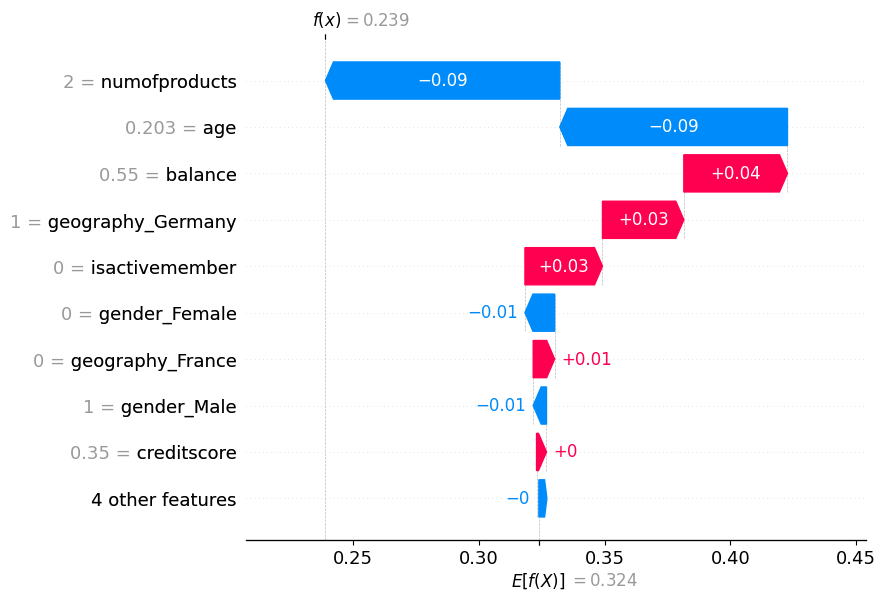

In [67]:
shap.plots.waterfall(shap_values[0])

In [68]:
test_data_sample = X_test.sample(500)

In [69]:
shap_values_sample = explainer(test_data_sample)

PermutationExplainer explainer: 501it [09:09,  1.11s/it]                         


In [70]:
shap_values_sample.shape

(500, 13)

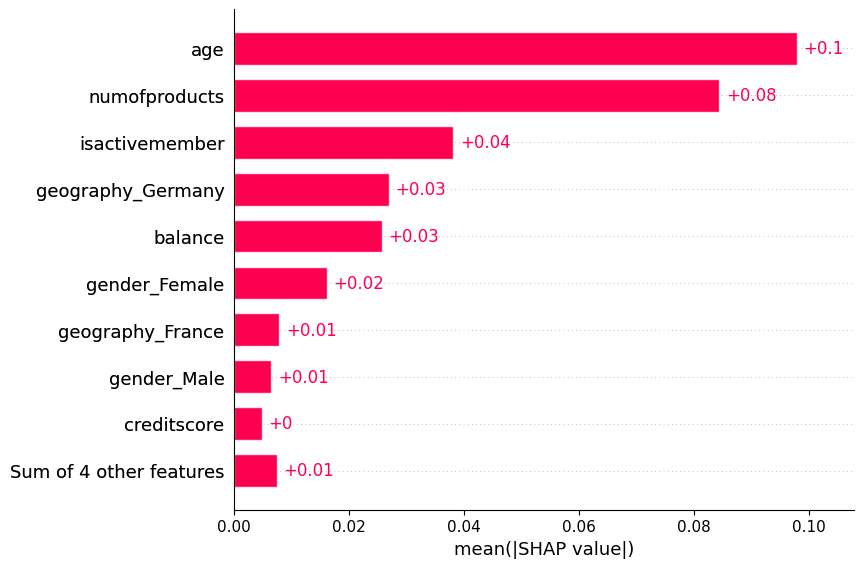

In [71]:
shap.plots.bar(shap_values_sample)

- Feature inportance -> calculation toward the prediction
- Output in probability space
- if its logit then output will be in log odd
- out is descending order
- Here we are averaging the shaply values of each feature .Here we will get shaply values - 13 as 13 feature and we are using abs as sometime shaply values are -ve.so for getting mean we need to convert them in +ve

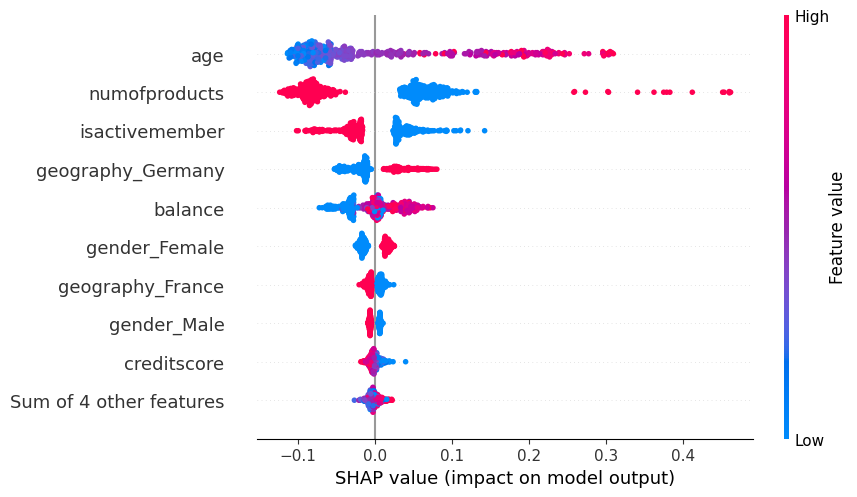

In [72]:
shap.plots.beeswarm(shap_values_sample)

- Here we can interprete as age increased its lead to churn as the graph describe age icreased red and purple values are more.
- No of product is high or low then chances of churm are more.
- if you are not active member then chances of churn are more. same as geography_germany if you are in then chances of churn are more
- If you are female then chances of chrun are more
- If your geography in france then chances of churn more 
- if your creditscore is low then also have chances of churn more.

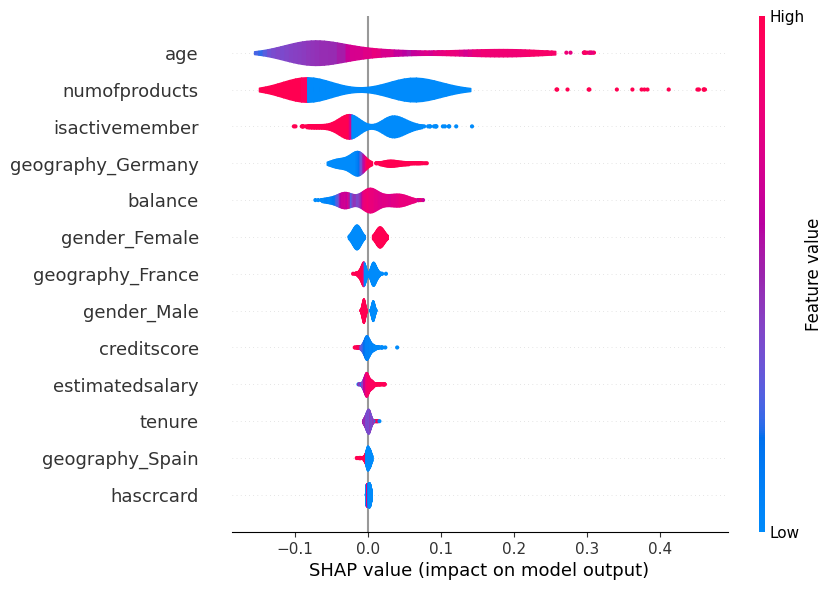

In [73]:
shap.plots.violin(shap_values_sample)

- Same like above plot

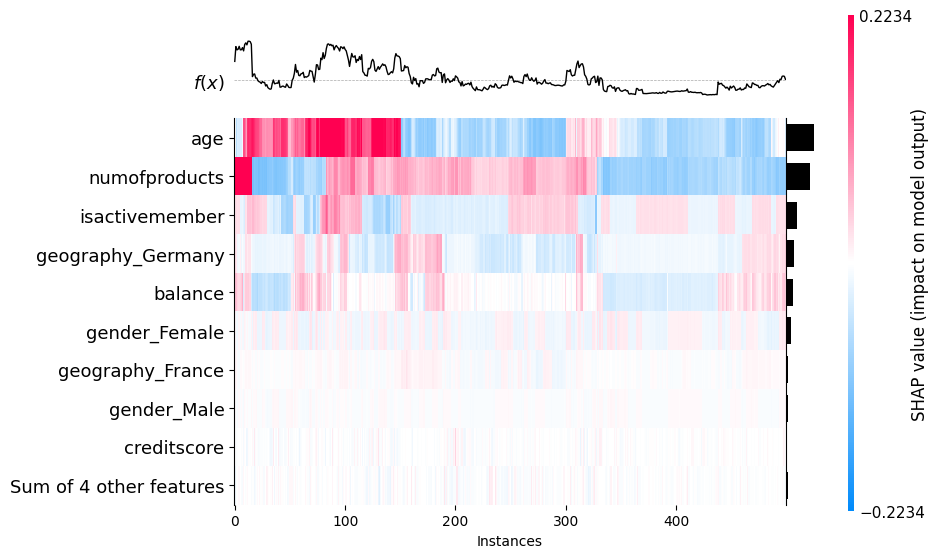

<Axes: xlabel='Instances'>

In [74]:
shap.plots.heatmap(shap_values_sample)

- Heatmap get desgined using clusteing algorithm so the instances we have not the same as indexes in the data

## LOcal Plots

In [75]:
test_case = X_test[y_test ==1].sample(1)

In [76]:
row_shap_values = explainer(test_case)[0]

In [77]:
row_shap_values

.values =
array([-0.0037333 , -0.04910527,  0.00352883, -0.00497492,  0.01609977,
        0.00682743, -0.0112179 , -0.0481397 ,  0.00123291, -0.00050041,
        0.03672963, -0.00022183, -0.02978432])

.base_values =
np.float64(0.32387903805405505)

.data =
array([0.806     , 0.24324324, 0.53911781, 0.22280253, 1.        ,
       0.        , 1.        , 0.        , 0.        , 7.        ,
       1.        , 1.        , 1.        ])

In [78]:
df.loc[test_case.index]

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,iszerobalance
8808,753,France,Female,36,7,128518.98,1,1,1,44567.83,1,0


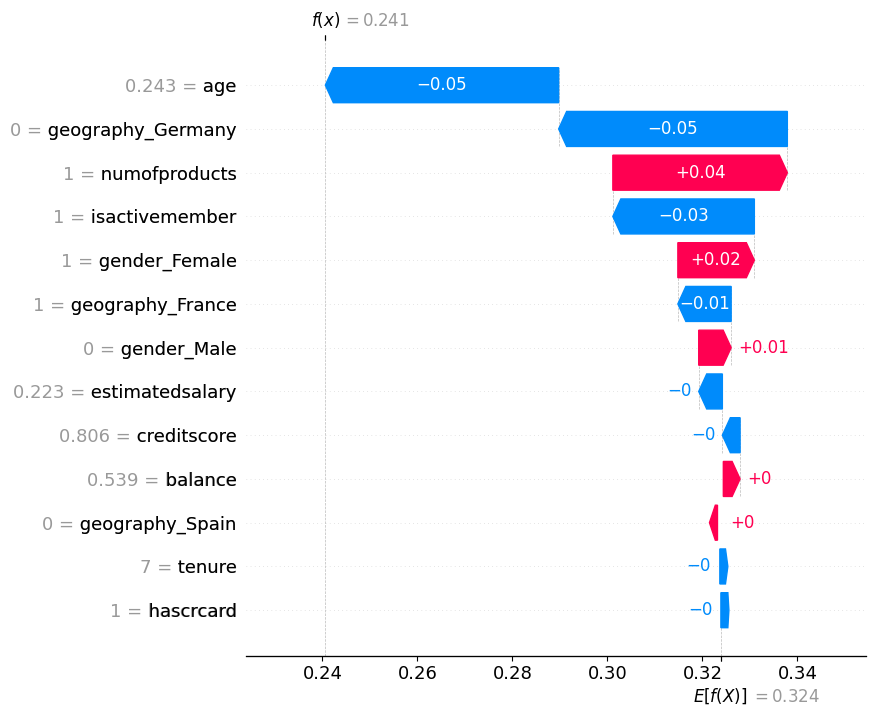

In [79]:
shap.plots.waterfall(row_shap_values,max_display=13)

- Here we applyied scaling so to get actual values we need to convert back.
- Also we can say this person buy 2 products and look like the person is female and might belong to france
- also person has good balance
- Total prediction we have 0 as f(x) is 0.324
- Age also around 60 so might get churned and no active member

In [80]:
shap.initjs()
shap.plots.force(row_shap_values)

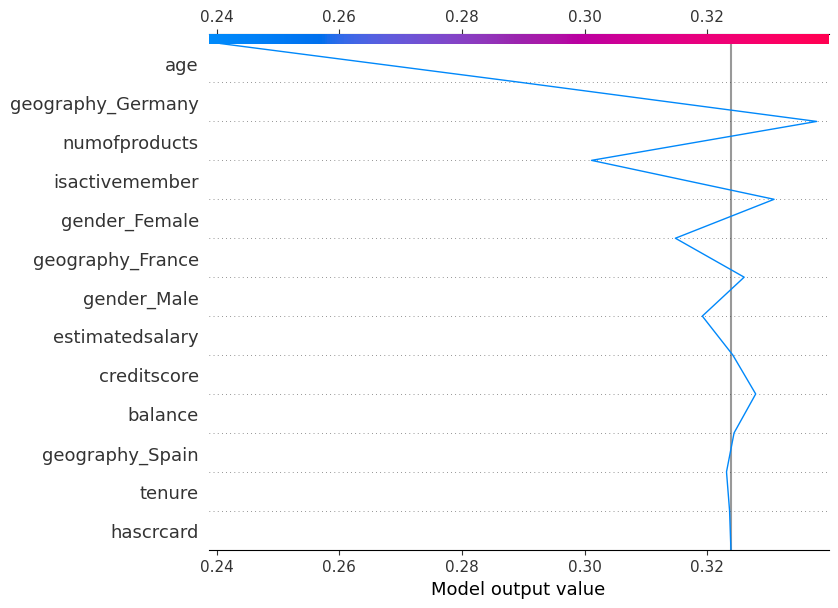

In [81]:
shap.plots.decision(shap_values = row_shap_values.values,base_value = row_shap_values.base_values,
                    feature_names =X_test.columns.to_list())

- Modle ouput values is probalility values
- How the individual feature contributed for the output
- need to read from down to up
- we have base value on the model output value and how the indivisual feature contributed and how the values go toward final prediction
- we can mostly use for batch interpretation

In [82]:
row_shap_values

.values =
array([-0.0037333 , -0.04910527,  0.00352883, -0.00497492,  0.01609977,
        0.00682743, -0.0112179 , -0.0481397 ,  0.00123291, -0.00050041,
        0.03672963, -0.00022183, -0.02978432])

.base_values =
np.float64(0.32387903805405505)

.data =
array([0.806     , 0.24324324, 0.53911781, 0.22280253, 1.        ,
       0.        , 1.        , 0.        , 0.        , 7.        ,
       1.        , 1.        , 1.        ])

In [83]:
# sample of test data
sample_batch_data = X_test.sample(10)


In [84]:
#Create batch
batch_shap_values = explainer(sample_batch_data)

In [85]:
batch_shap_values.shape

(10, 13)

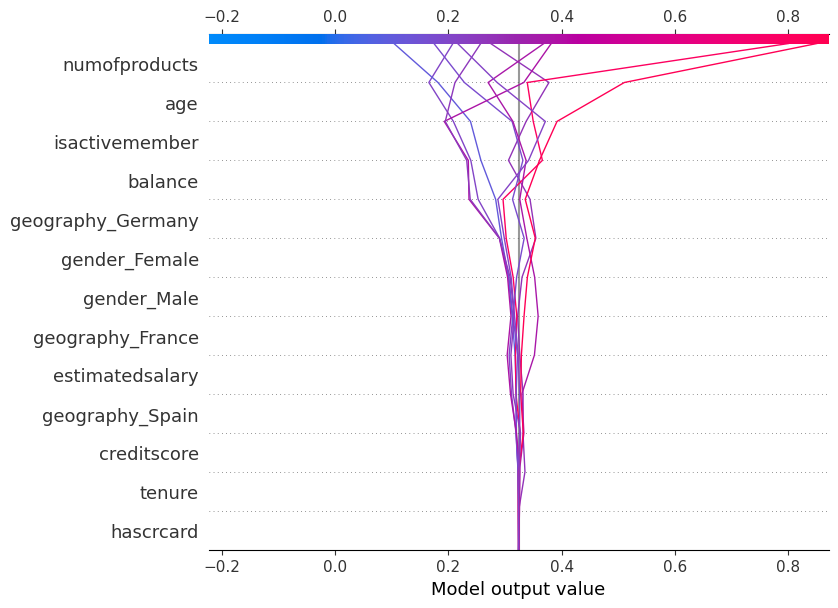

In [86]:
shap.plots.decision(shap_values = batch_shap_values.values,base_value = batch_shap_values.base_values[0],
                    feature_names =X_test.columns.to_list())

## LIME

In [87]:
test_case

,creditscore,age,balance,estimatedsalary,gender_Female,gender_Male,geography_France,geography_Germany,geography_Spain,tenure,numofproducts,hascrcard,isactivemember
8808,0.806,0.243243,0.539118,0.222803,1.0,0.0,1.0,0.0,0.0,7,1,1,1


In [88]:
test_case_lime = test_case.values.flatten()

In [89]:
feature_names = preprocessor.get_feature_names_out().tolist()

In [90]:
preprocessor.get_feature_names_out()

array(['creditscore', 'age', 'balance', 'estimatedsalary',
       'gender_Female', 'gender_Male', 'geography_France',
       'geography_Germany', 'geography_Spain', 'tenure', 'numofproducts',
       'hascrcard', 'isactivemember'], dtype=object)

In [92]:
# list of index numbers of categorical features in data

categorical_features = [4, 5, 6, 7, 8, 11, 12, 13]

In [93]:
from lime.lime_tabular import LimeTabularExplainer

In [94]:
# create the explainer

lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    mode="classification",
    feature_names=feature_names,
    categorical_features=categorical_features
)

In [95]:
# create an explanation

lime_explanation = lime_explainer.explain_instance(data_row=test_case_lime,
                                                   predict_fn=model.predict_proba)

c:\DS_Material\CSU\CV\SHAP-PRJ\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\DS_Material\CSU\CV\SHAP-PRJ\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [96]:
# view my explanations --> as a list

lime_explanation.as_list()

[('0.19 < age <= 0.26', -0.1131450878696915),
 ('numofproducts <= 1.00', 0.1126896648720506),
 ('isactivemember=1', -0.09299178524854505),
 ('geography_Germany=0', -0.04407264951411186),
 ('gender_Female=1', 0.0357239855780618),
 ('gender_Male=0', 0.017812666564329584),
 ('geography_France=1', -0.011673418612036236),
 ('balance > 0.54', 0.011564767622942939),
 ('geography_Spain=0', 0.010558008289495387),
 ('hascrcard=1', 0.005165203010781802)]

In [97]:
from IPython.core.display import HTML

In [98]:

display(HTML(lime_explanation.as_html()))